# The project.

Suicide is a topic of intest to me as it has touched very close to home and seems to be getting worse in some countries in the world, including the US. I'm curious to examine the global trends in this topic to get a more complete image of what the reality of this drama is. I will approach the analysis from 3 perpectives: last 5 years. USA by sex and generation, last 30 years for 2 countries of my particular interest</font>

## The dataset: 

"Suicide Rates Overview 1985 to 2016" by the World Bank aggregates socio-economic info with suicide rates for most countries in the world. It contains suicides counts by year, age, sex and country for over a hundred countries globally. The entire dataset will not be examined as it lacks info which absence generates biases about global trends (i,e, China and India are missing from the dataset).

The dataset's shape is 27.8k X 11 after the column for Human Development Index 'HDI for year' dropped for simplicity.

Variables:

__Country__: Categorical / Nominal<br>
__Year__: Categorical / Ordinal<br>
__Sex__: Categorical / Nominal<br>
__Suicide_no__: Absolute number of suicide cases. Quantitative / discrete<br>
__Population__: Total number of individuals within a population<br>
__gdp_for_year__: Total gdp for the country for the year. Common to all rows for the country in that year.<br>
__gdp_per_capita__: National gdp divided by population. Common to all rows for the country in that year.<br>
__generation__: 
1. G I Generation (the Greatest Generation: lived through the great depression and WWII):Born on or before 1924
2.  Silent: Born between 1925 and 1945
3.  Baby Boomers: Born between 1946 and 1964
4.  X: Born between 1965 and 1980
 

For sake of simplicity I have averaged the suicide rate in years 2011 and 2015 to generate charts on those years.

### The exploration: ###

I'm interested to answer a few questions based on this dataset:

__-What are the 10 countries with the highest suicide rate in the last 5 years for which there is data available?__ <br> Only years 2011 - 2015 will be taken into account and population and suicides number will be used to generate a new variable with overall numbers. The purpose of this question is to work across years and to examine a bit more in depth the top country

__-What is the trend in suicide rates in the United States in the last 20 years? The dataframe will be used to extract info for USA only and the following questions: What is the male/female ratio of suicide in USA? How has the overall number evolved over time? What is the generational breakdown of such cases?__ The purpose of this exercise is to focus on just one place and extract the most out of it. 

__-What are the differences and similarities between suicide rates in Colombia and Mexico?__ Colombia being my native country and Mexico being very close to my heart interest me the most. The purpose of this is to have a direct comparison.

In [124]:
#import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline


In [125]:
#examine the dataset and drop unnecesary columns
df = pd.read_csv('/Users/carandu/thinkful_projects/capstone_1/master.csv')
df = df.drop('HDI for year',1)
#Let's examine the new dataframe
df.shape

(27820, 11)

### Question 1: 
What are the 10 countries with the highest suicide rate in the last 5 years? Let's make a subset of the years 2011 - 2015

In [143]:
df_five_years = df[(df['year'] >= 2011) & (df['year'] < 2016)]
df_five_years.shape

(4644, 11)

In [144]:
#Group by country, aggregate by suicide number and population and find a combined natl average
df_five_years = df.groupby(['country']).agg({'suicides_no':sum, 'population':sum})
df_five_years['natl_average'] = df_five_years['suicides_no'] /  df_five_years['population'] * 100000
df_five_years = df_five_years.sort_values(by='natl_average', ascending = False)
df_five_years.head(10)

,suicides_no,population,natl_average
country,,,
Lithuania,28039,68085210,41.182219
Russian Federation,1209742,3690802620,32.777207
Sri Lanka,55641,182525626,30.483939
Belarus,59892,197372292,30.344685
Hungary,73891,248644256,29.717558
Latvia,12770,44852640,28.471011
Kazakhstan,101546,377513869,26.898614
Slovenia,10615,40268619,26.360477
Estonia,7034,27090810,25.964525


<Figure size 720x432 with 0 Axes>

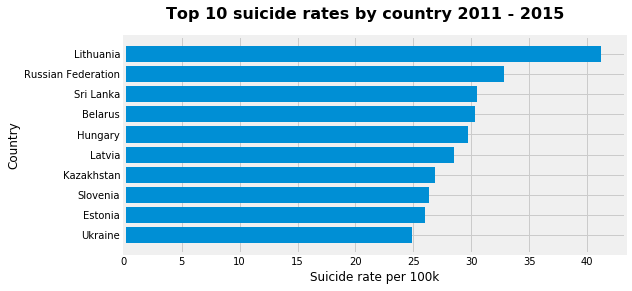

In [128]:
#Plot of those 10 countries in a horizontal bar chart

x = df_five_years.index[:10]
y = df_five_years['natl_average'][:10]
fig = plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8,4))
plt.barh(x, y, label='lithuania')
plt.ylabel('Country', fontsize = 12)
plt.xlabel('Suicide rate per 100k', fontsize = 12)
fig.suptitle('Top 10 suicide rates by country 2011 - 2015', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis() #This line inverts the order and places the country with the highest rate on top.
plt.show()

Lithuania tops the list with a suicide rate of 41.18 per 100k, 26% larger than the second country in the chart, the Russian Federation. This and other sources corroborate the fact that suicide in Luthuania is indeed a public health problem. Also interesting to see that 6 other countries with the higuest suicide rate are neighbors with Luthiania and it is worth asking the question if geographical and socioeconomic conditions influence this problem on a regional level. There's only one country from South Asia in the top 10 (Sri Lanka).

Let's examine the story of the top country in the list more closely by filtering Lithuania for just 5 years:

In [145]:
#lithuania df
lithuania = df[(df['country'].isin(['Lithuania']))&(df['year'] >= 2011) & (df['year'] < 2016)]
lithuania_year = lithuania.groupby(['year']).agg({'suicides_no':sum, 'population':sum})
lithuania_year['rate'] = lithuania_year['suicides_no'] / lithuania_year['population'] * 100000

Let's see what the data shows as suicide rates for Luthiania in the last 5 years:

year
2011    35.349616
2012    32.666495
2013    38.658504
2014    33.434271
2015    32.535370
Name: rate, dtype: float64


<Figure size 864x432 with 0 Axes>

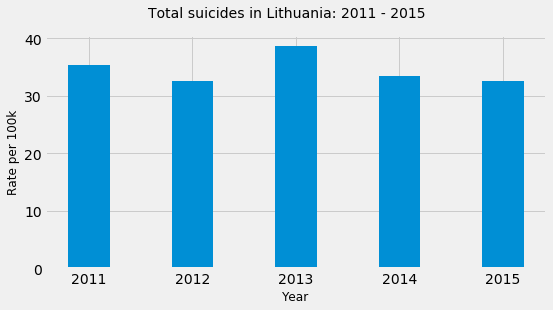

In [130]:
x = lithuania_year.index
y = lithuania_year['rate']
width = 0.4
fig = plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,4))
plt.bar(x, y, width, label='lithuania')
plt.ylabel('Rate per 100k', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.suptitle('Total suicides in Lithuania: 2011 - 2015', fontsize = 14)
print(y)
plt.show()

In [131]:
lithuania_gen = lithuania.groupby(['year','generation']).agg({'suicides_no':sum, 'population':sum}).unstack(level=-1)
lithuania_gen.head()

suicides_no                                             population  \
generation     Boomers Generation X Generation Z Millenials Silent    Boomers   
year                                                                            
2011               281          416            2        225     94     641320   
2012               240          395            3        199     90     641735   
2013               264          457            5        256    103     645931   
2014               251          352            5        205    117     652746   
2015               271          321            5        194    105     660668   

                                                         
generation Generation X Generation Z Millenials  Silent  
year                                                     
2011             880957       300930     802744  253854  
2012             864926       290316     781203  259590  
2013             847331       282271     766873  264221  
2014             828253       276985     755393  268200  
2015             807096       273621     741511  271030

generation    Boomers  Generation X  Generation Z  Millenials     Silent
year                                                                    
2011        43.815880     47.221374      0.664606   28.028861  37.029158
2012        37.398615     45.668647      1.033357   25.473532  34.670057
2013        40.871239     53.934059      1.771347   33.382320  38.982518
2014        38.452936     42.499091      1.805152   27.138192  43.624161
2015        41.019090     39.772220      1.827345   26.162795  38.741099


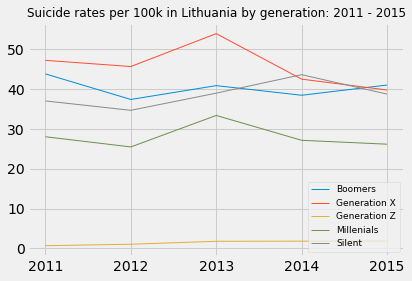

In [132]:
x = lithuania_gen.index
y = (lithuania_gen['suicides_no'] / lithuania_gen['population'])*100000
plt.plot(x, y['Boomers'], linewidth=1.0)
plt.plot(x, y['Generation X'], linewidth=1.0)
plt.plot(x, y['Generation Z'], linewidth=1.0)
plt.plot(x, y['Millenials'], linewidth=1.0)
plt.plot(x, y['Silent'], linewidth=1.0)
plt.legend(loc='lower right', frameon=True, fontsize=9)
plt.title('Suicide rates per 100k in Lithuania by generation: 2011 - 2015', fontsize = 12)
plt.plot(figsize=(10,16))
print(y)



In [133]:
lit_usa = df[(df['country'].isin(['United States', 'Lithuania']))&(df['year'] >= 2011) & (df['year'] < 2016)]
lit_usa_year = lit_usa.groupby(['country', 'year']).agg({'suicides_no':sum, 'population':sum})
lit_usa_year['rate per 100k'] = lit_usa_year['suicides_no'] / lit_usa_year['population'] *100000
lit_usa_year

suicides_no  population  rate per 100k
country       year                                        
Lithuania     2011         1018     2879805      35.349616
              2012          927     2837770      32.666495
              2013         1085     2806627      38.658504
              2014          930     2781577      33.434271
              2015          896     2753926      32.535370
United States 2011        39508   290313825      13.608722
              2012        40596   292827128      13.863470
              2013        41143   295322862      13.931532
              2014        42769   297749735      14.364077
              2015        44189   300078511      14.725813

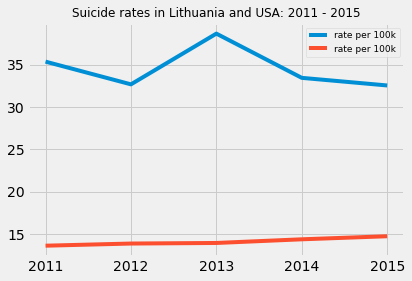

In [134]:
#get_level_values() function enables you to get the index by name from a multiindex dataframe.

plt.plot(lit_usa_year.iloc[lit_usa_year.index.get_level_values('country') == 'Lithuania', :].index.get_level_values(
    'year'), lit_usa_year.iloc[lit_usa_year.index.get_level_values('country') == 'Lithuania', :]["rate per 100k"])

plt.plot(lit_usa_year.iloc[lit_usa_year.index.get_level_values('country') == 'United States', :].index.get_level_values(
    'year'), lit_usa_year.iloc[lit_usa_year.index.get_level_values('country') == 'United States', :]["rate per 100k"])

plt.legend(loc='best', frameon=True, fontsize=9)
plt.title('Suicide rates in Lithuania and USA: 2011 - 2015', fontsize = 12)
plt.plot(figsize=(10,16))
plt.show()

In [135]:
#let's compare Lithuania with the USA
lit_usa_country = lit_usa.groupby(['year', 'country','generation']).agg({'suicides_no':sum, 'population':sum})
lit_usa_country['per 100k'] = lit_usa_country['suicides_no'] /  lit_usa_country['population'] * 100000
#lithuania_usa_gen = lithuania_usa.groupby(['year','generation']).agg({'suicides_no':sum, 'population':sum})
lit_usa_country.head(20)

suicides_no  population   per 100k
year country       generation                                      
2011 Lithuania     Boomers               281      641320  43.815880
                   Generation X          416      880957  47.221374
                   Generation Z            2      300930   0.664606
                   Millenials            225      802744  28.028861
                   Silent                 94      253854  37.029158
     United States Boomers              9700    59825053  16.213943
                   Generation X        15457    85051429  18.173710
                   Generation Z          287    41436606   0.692624
                   Millenials          10922    85280972  12.807077
                   Silent               3142    18719765  16.784399
2012 Lithuania     Boomers               240      641735  37.398615
                   Generation X          395      864926  45.668647
                   Generation Z            3      290316   1.033357
                   Millenials            199      781203  25.473532
                   Silent                 90      259590  34.670057
     United States Boomers             10296    61717986  16.682333
                   Generation X        15620    84564721  18.471060
                   Generation Z          311    41472067   0.749902
                   Millenials          11088    86063135  12.883565
                   Silent               3281    19009219  17.260046

In [136]:
#lit_usa_country.loc[[2011], ['Boomers']]
#lit_usa_country.query("year == '2014' and generation == 'Boomers'")
usa_boomers = lit_usa_country.query("country == 'United States' and generation == 'Boomers'")
lit_boomers = lit_usa_country.query("country == 'Lithuania' and generation == 'Boomers'")
lit_boomers

,,,suicides_no,population,per 100k
year,country,generation,,,
2011,Lithuania,Boomers,281,641320,43.815880
2012,Lithuania,Boomers,240,641735,37.398615
2013,Lithuania,Boomers,264,645931,40.871239
2014,Lithuania,Boomers,251,652746,38.452936
2015,Lithuania,Boomers,271,660668,41.019090


### Question 2:
After bridging the switch from Luthiania into the USA, let's take a closer look at what happens in America:

In [153]:
df_usa = df[df.country == 'United States'] #this is filtering!!!
usa_by_year = df_usa.groupby(['year']).agg({'suicides_no':sum, 'population':sum})
usa_by_year['natl_average'] = usa_by_year['suicides_no'] / usa_by_year['population']*100000
usa_by_year

,suicides_no,population,natl_average
year,,,
1985,29446,220723000,13.340703
1986,30892,222953000,13.855835
1987,30783,225148000,13.672340
1988,30388,227353000,13.365999
1989,30218,229487000,13.167630
1990,30895,229952200,13.435401
1991,30790,232955000,13.217145
1992,30471,235565600,12.935250
1993,31084,238092300,13.055441


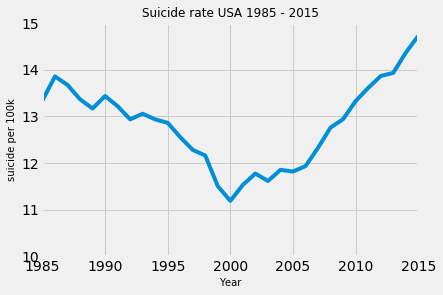

In [151]:
x = usa_by_year.index
y = usa_by_year['natl_average']
plt.title("Suicide rate USA 1985 - 2015", fontsize = 12)
plt.ylabel('suicide per 100k', fontsize = 10)
plt.xlabel('Year', fontsize = 10)
plt.axis([1985, 2015, 10, 15])
plt.plot(x, y)
plt.show()


Looks like the overall suicide rate in the US is on the raise again, 14.72 suicide cases per 100k in 2015 after hitting a 30 year low of 11.18 per 100k in the year 2000. 

Let's see what the trend by gender in the US is:

In [160]:
usa_by_year = df_usa.groupby(['year','sex']).agg({'suicides_no':sum, 'population':sum})
usa_by_year['average'] = usa_by_year['suicides_no'] /  usa_by_year['population'] * 100000
usa_by_year

suicides_no  population    average
year sex                                       
1985 female         6308   113781000   5.543984
     male          23138   106942000  21.636027
1986 female         6677   114865000   5.812911
     male          24215   108088000  22.403042
1987 female         6522   115958000   5.624450
     male          24261   109190000  22.219068
1988 female         6327   117061000   5.404874
     male          24061   110292000  21.815726
1989 female         6128   118104000   5.188647
     male          24090   111383000  21.628076
1990 female         6179   118311900   5.222636
     male          24716   111640300  22.138959
1991 female         6038   119813000   5.039520
     male          24752   113142000  21.876933
1992 female         6023   121065900   4.974976
     male          24448   114499700  21.352021
1993 female         6092   122367300   4.978454
     male          24992   115725000  21.596025
1994 female         5966   123632000   4.825611
     male          25157   116982100  21.504999
1995 female         5914   124875600   4.735913
     male          25358   118288600  21.437400
1996 female         5899   126055200   4.679696
     male          24980   119942600  20.826629
1997 female         6041   127269600   4.746617
     male          24476   121216800  20.191921
1998 female         6037   128982300   4.680487
     male          24521   122350200  20.041651
1999 female         5741   130154787   4.410902
     male          23442   123593884  18.966958
...                  ...         ...        ...
2001 female         5949   135519720   4.389767
     male          24658   129907826  18.981151
2002 female         6246   137123948   4.555003
     male          25399   131635611  19.294931
2003 female         6281   138109635   4.547836
     male          25196   132931875  18.954070
2004 female         6873   139309727   4.933611
     male          25555   134274409  19.031921
2005 female         6729   140488280   4.789723
     male          25900   135618400  19.097704
2006 female         6992   141910455   4.927051
     male          26300   137070393  19.187222
2007 female         7329   142743825   5.134373
     male          27267   137914781  19.770905
2008 female         7583   143315811   5.291112
     male          28447   139039754  20.459616
2009 female         7821   144708230   5.404668
     male          29079   140454432  20.703512
2010 female         8087   146028555   5.537958
     male          30275   141810594  21.348899
2011 female         8512   147236386   5.781180
     male          30996   143077439  21.663793
2012 female         8819   148454780   5.940529
     male          31777   144372348  22.010448
2013 female         9094   149659609   6.076456
     male          32049   145663253  22.002117
2014 female         9659   150830949   6.403858
     male          33110   146918786  22.536260
2015 female        10199   151958511   6.711700
     male          33990   148120000  22.947610

[62 rows x 3 columns]

On average, the suicide rate in the male population is 4 times that of the female population. Let's look at it on a plot

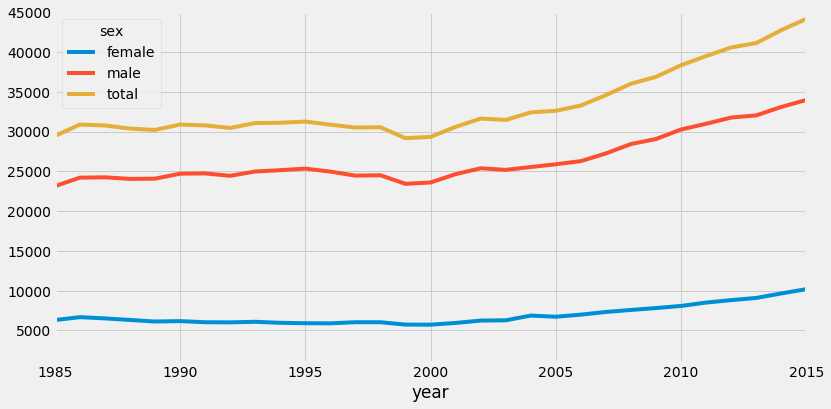

In [162]:
#make a barplot with male and female next to each other for every year
#plt.bar(usa_by_year['suicides_no'], usa_by_year['population'], label='By sex')
fig, ax = plt.subplots(figsize=(12,6))
plt.axis([1985, 2015, 1000, 45000])
q = usa_by_year.groupby(['year','sex']).sum()['suicides_no'].unstack()
q['total'] = q['male'] + q['female']
plt.style.use('fivethirtyeight')
q.plot(ax=ax)
usa_by_year
plt.show()

### Question 3:
Let's dig a bit deeper into my beloved countries: Colombia and Mexico

In [188]:
#creating new dataframes for Mexico and Colombia (2 ways)
col = df[df.country == 'Colombia']
mex = df[df.country == 'Mexico']
#col = df.loc[df['country'] == 'Colombia']
#mex = df.loc[df['country'] == 'Mexico']

In [189]:
new_col = col.groupby(['year']).agg({'suicides_no':sum, 'population':sum}) ## best practice->groupby LIST!!!!
new_mex = mex.groupby(['year']).agg({'suicides_no':sum, 'population':sum})
new_col['natl_average'] = new_col['suicides_no'] /  new_col['population'] * 100000
new_mex['natl_average'] = new_mex['suicides_no'] /  new_mex['population'] * 100000
new_mex.head(30)

,suicides_no,population,natl_average
year,,,
1985,1544,67566000,2.285173
1986,1714,69123500,2.479620
1987,1701,67948100,2.503381
1988,1703,69646000,2.445223
1989,1865,71359000,2.613546
1990,1926,73076900,2.635580
1991,2103,74796300,2.811636
1992,2237,75285800,2.971344
1993,2342,76826800,3.048415


To start, let's just say that suicides rates are much lower in Mexico and Colombia than those in the US. 

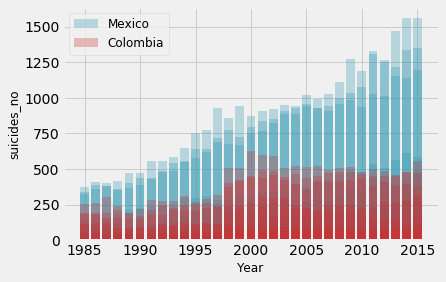

In [196]:
#fig, ax = plt.subplots(figsize=(10,5))
#pos = list(range(len(col['year'])))
#width = [0.1,0.2,3,1.5,0.3]
plt.bar(mex['year'], mex['suicides_no'], label='Mexico', color=(0.2, 0.6, 0.7, 0.3))
plt.bar(col['year'], col['suicides_no'], label='Colombia', color=(0.8, 0.2, 0.2, 0.3))

plt.ylabel('suicides_no', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.style.use('fivethirtyeight')
plt.legend(loc='best',frameon=True, prop={'size': 12})
plt.show()

Conclusions:

This is a very general approach to this dataset. Given that it had statistics for over 100 countries in a 30 year span it is easy to get lost in the data. Some of the main challenges that arose during the analysis were: 
1. It is hard to measure apples to apples when there's very likely excellent info for developed countries and not so good data on poorer countries in which there are less resources to keep track of accurate data. 
2. What to do with the null values? How do the null values affect the overall conclusions?
3. For future research, I'd like to to group countries by geographic region (i,e,. continent) or by more specific common economic indicators (i.e., GDP per capita). As I go further into the program it is my goal to approach this problem adding more complex queries to the set.
4. The answer to the 1st question is more an exercice in filtering and grouping data than an accurate approach: given that the suicides per year happen only once but most of the population survives from one year to the other, it is simply not that simple as dividing suicides by population for such a time span. Still, I thought it would point me in the right direction.
5. This data set is easily grouped by many columns at a time, which creates new multi-index dataframes. These proved very tricky to work with when plotting and subplotting.
6. I couldn't plot 'natl_average' on the MEX - COL graphic.
